In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

#READING CSV FILES

df = pd.read_csv('athlete_events.csv')
dr = pd.read_csv('rd1.csv')	
# print(df)

a2 = df[df['Season']=='Summer']
a2.to_csv("summer.csv",index = False)
ds = pd.read_csv('summer.csv')
#print(ds)

a3 = df[df['Season']=='Winter']
a3.to_csv('winter.csv', index = False)
dw = pd.read_csv('winter.csv')
#print(dw)
df = pd.concat([df,pd.get_dummies(df.Medal)],axis=1)
df['allmedals']= df['Bronze'] + df['Gold'] + df['Silver'] 

ds = pd.concat([ds,pd.get_dummies(ds.Medal)],axis=1)
ds['allmedals']= ds['Bronze'] + ds['Gold'] + ds['Silver'] 

In [375]:
#Total No of people participating from India

c = ds[ds.Team == 'United States']
#c = ds[ds.NOC == 'USA']

In [376]:

#Total Participants till date

t_part = c['Name'].nunique()
print(t_part)

#Total no of people participated in summer olympics

t_parts = c[df.Season=='Summer']['Name'].nunique()
print(t_parts)

# #Total no of people participated in winter olympics

# t_partw = c[df.Season=='Winter']['Name'].nunique()
# print(t_partw)



7717
6542


/home/uday/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [377]:
#total medals won by that country till date.
t_medals = c.groupby(['Year','Event'],as_index=False).max()['allmedals'].sum()
t_medals

1822

In [387]:
c_group = c.groupby(['Year','Event','Sport','Team'],as_index=False).max()
cm_add = c_group.groupby(['Year', 'Sport','Team'],as_index=False).sum()
c_medals = cm_add.groupby(['Year','Team'],as_index=False).sum()


c_medal_year = c_medals.sort_values('Year', ascending = False)
# t= z.groupby('Sport').agg({'allmedals':'count'})
#dfindyears
team_name = c_medal_year.loc[1,'Team']
z = c_medal_year[['Year','allmedals']]
z= z.sort_values('Year')

#Line- Scatter_Plot
# plt.plot(z.Year,z.allmedals,linestyle="dashed", marker="o", color="black",label =('Medal Count of:', team_name) )
# plt.xlabel('Year')
# plt.ylabel('No of Medals')
# # plt.yticks(range())
# plt.xticks(range(1896,2018,4),rotation = 82)
# fig = plt.gcf()
# fig.set_size_inches(18.5, 15.5)
# plt.title("Medal Count for the  Given country")
# plt.legend()
# plt.show()




Text(0, 0.5, 'PARTICIPANTS')

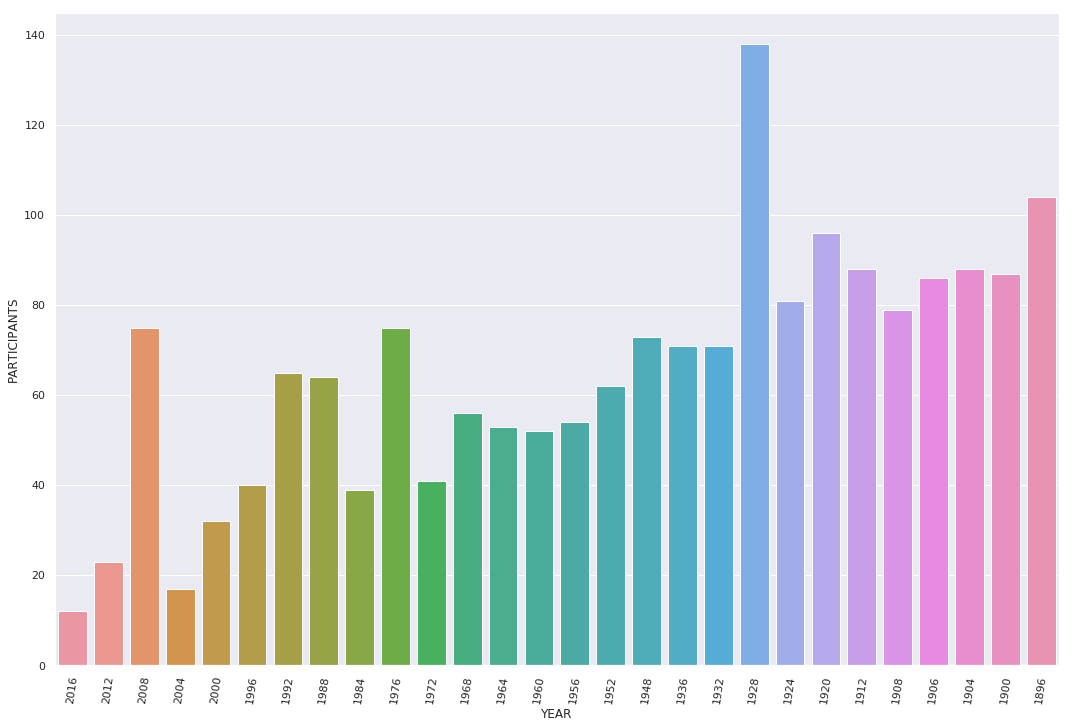

In [379]:
#Medal Winners by country

sns.set(rc={'figure.figsize':(18,12)})
plot1 = sns.barplot('Year','allmedals',data=z).set_xticklabels(z.Year,rotation=82)
#plot1.set(xlabel='YEAR',ylabel='Number of people')
plt.xlabel("YEAR")
plt.ylabel("PARTICIPANTS")

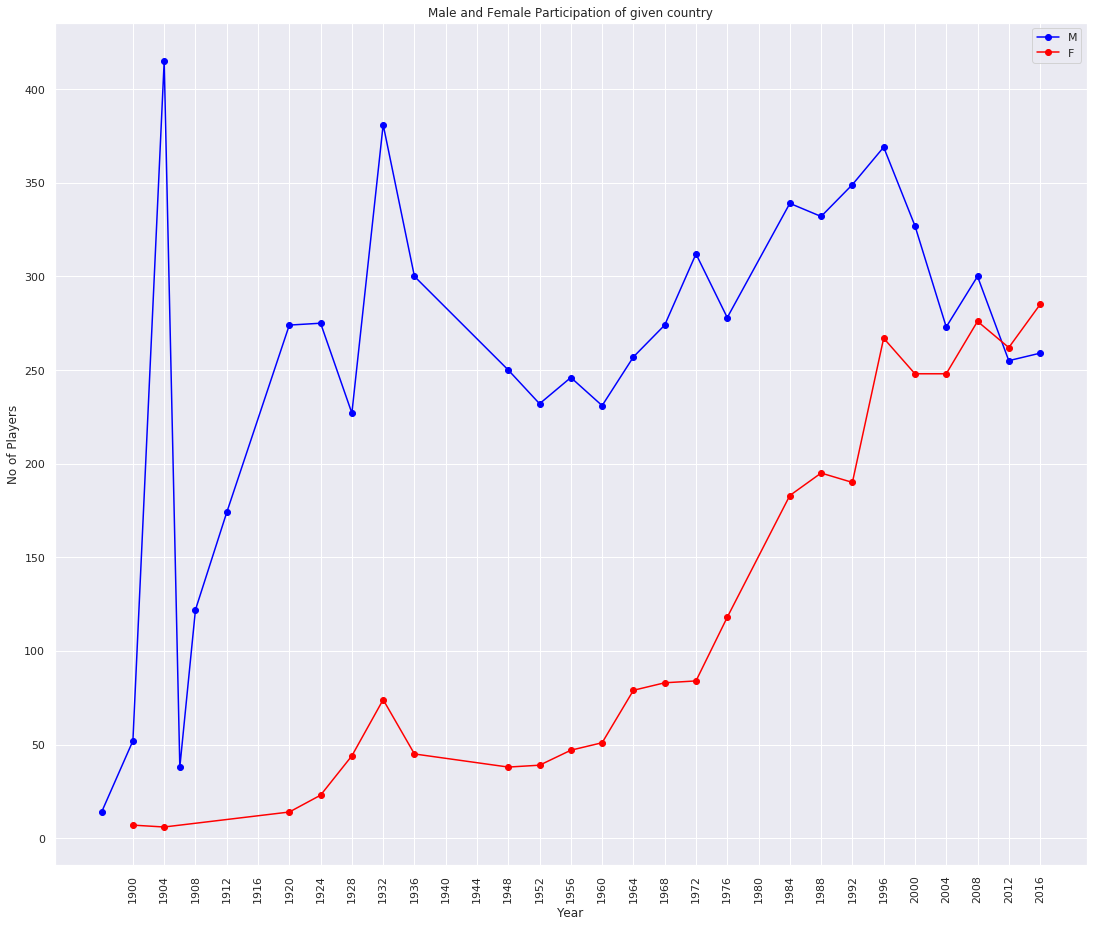

In [380]:
#MALE AND FEMALE PARTICIPATION THROUGH THE YEARS

ct = c.groupby(['Year','Sex']).agg({'Name':'nunique'})
ct = ct.rename(columns={'Name': 'Count'})
ct = ct.reset_index()
cm = ct[ct.Sex=='M']
cf = ct[ct.Sex=='F']

team_name = c_medal_year.loc[1,'Team']

#indmf.loc[:,'M'].plot()
cm = cm.rename(columns={'Count': 'M'})
cf = cf.rename(columns={'Count': 'F'})
# ct['M'] = cm['M']
# ct['F'] = cf['F']
# ct= ct[['Year','M','F']]
# ct
plt.plot(cm.Year,cm.M, marker="o", color="blue" )
plt.plot(cf.Year,cf.F,marker="o", color="red" )
plt.xlabel('Year')
plt.ylabel('No of Players')

plt.xticks(range(1900,2018,4),rotation = 90)
fig = plt.gcf()
fig.set_size_inches(18.5, 15.5)
plt.title("Male and Female Participation of given country")
plt.legend()
plt.show()

In [381]:
#Dominated top 5 sports

t5s = c.groupby('Sport').agg({'Medal':'count'}).sort_values('Medal', ascending = False)
top5_s = t5s.reset_index()
# top5_s = t5s.head(5)
top5_s = top5_s.head(5)
top5_s
plt

<module 'matplotlib.pyplot' from '/home/uday/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

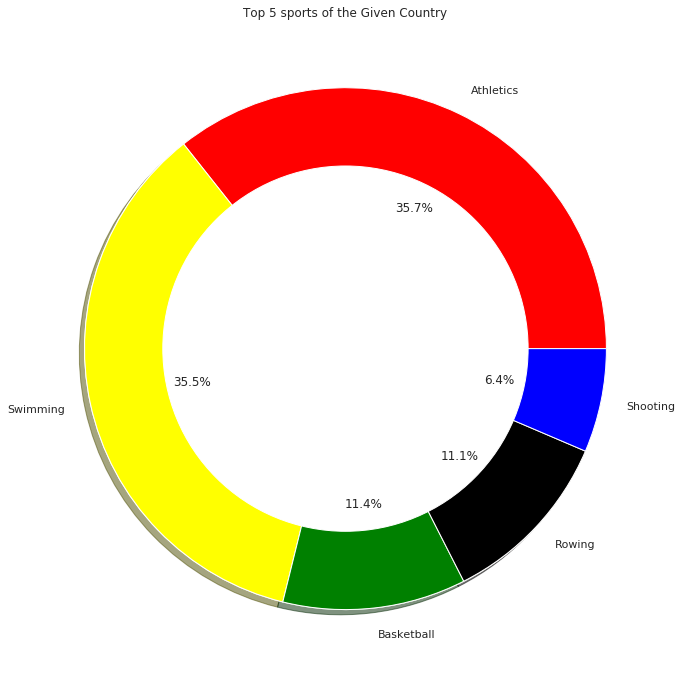

In [382]:
#TOP 5 SPORTS OF THE COUNTRY


size_of_groups= top5_s.Medal
names = top5_s.Sport 
# Create a pieplot
plt.pie(size_of_groups)
#plt.show()
 
# add a circle at the center
# 
# p=plt.gcf()
# p.gca().add_artist(my_circle)

plt.pie(size_of_groups, labels=names, autopct = '%1.1f%%', colors=['red','yellow','green','black','blue'], shadow= True)
p=plt.gcf()
my_circle=plt.Circle( (0,0), 0.7, color='white')
p.gca().add_artist(my_circle)
plt.title('Top 5 sports of the Given Country')
plt.show()


In [383]:
#TOP 5 PLAYERS OF THE GIVEN COUNTRY

t5p = c.groupby(['Name']).agg({'Medal':'count'}).sort_values('Medal',ascending = False)
t5p = t5p.reset_index()
t5p = t5p.head(5)
t5p

,Name,Medal
0,"Michael Fred Phelps, II",28
1,Natalie Anne Coughlin (-Hall),12
2,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12
3,Ryan Steven Lochte,12
4,"Dara Grace Torres (-Hoffman, -Minas)",12


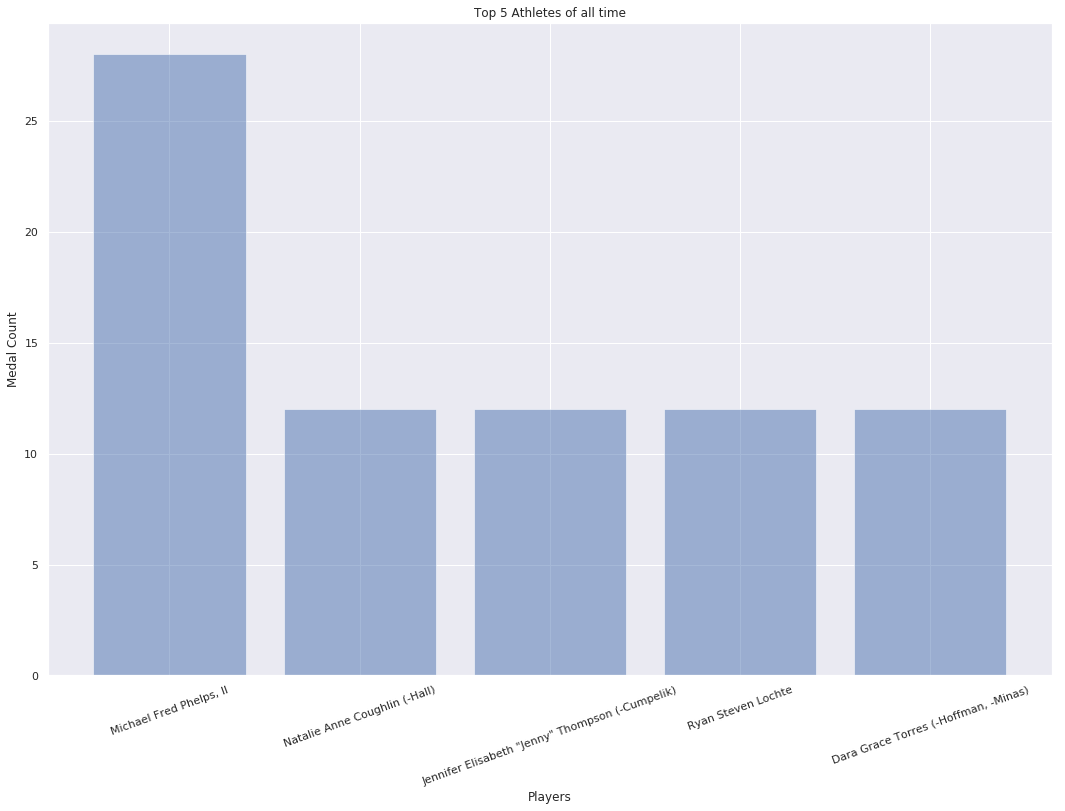

In [384]:

objects = t5p.Name
y_pos = np.arange(len(objects))
performance = t5p.Medal
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation = 20)
plt.xlabel('Players')
plt.ylabel('Medal Count')
plt.title('Top 5 Athletes of all time')
 
plt.show()

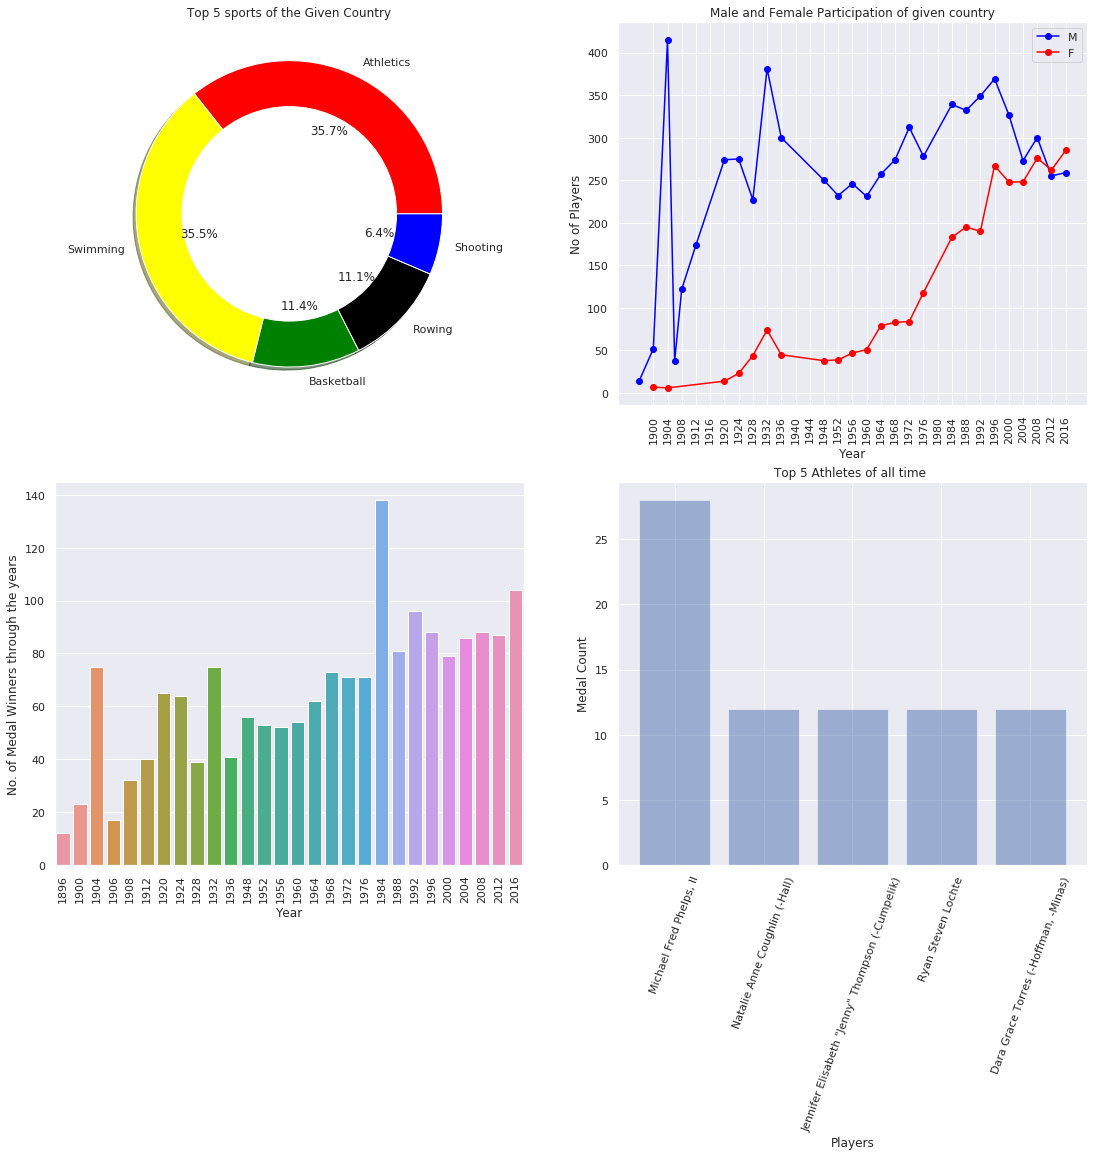

In [388]:
#subplot code

fig = plt.figure()

plt.subplot(2, 2, 1)

names = top5_s.Sport 
plt.pie(size_of_groups, labels=names, autopct = '%1.1f%%', colors=['red','yellow','green','black','blue'], shadow =True)
p=plt.gcf()
my_circle=plt.Circle( (0,0), 0.7, color='white')
p.gca().add_artist(my_circle)
plt.title('Top 5 sports of the Given Country')

plt.subplot(2, 2, 2)

plt.plot(cm.Year,cm.M, marker="o", color="blue" )
plt.plot(cf.Year,cf.F,marker="o", color="red" )
plt.xlabel('Year')
plt.ylabel('No of Players')
plt.xticks(range(1900,2018,4),rotation = 90)
fig = plt.gcf()
fig.set_size_inches(18.5, 15.5)
plt.title("Male and Female Participation of given country")
plt.legend()


plt.subplot(2, 2, 3)


sns.set(rc={'figure.figsize':(18,12)})
plot1 = sns.barplot('Year','allmedals',data=z).set_xticklabels(z.Year,rotation=90)
#plot1.set(xlabel='YEAR',ylabel='Number of people')

plt.xlabel("Year")
plt.ylabel("No. of Medal Winners through the years")




plt.subplot(2, 2, 4)

objects = t5p.Name
y_pos = np.arange(len(objects))
performance = t5p.Medal
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation = 70)
plt.xlabel('Players')
plt.ylabel('Medal Count')
plt.title('Top 5 Athletes of all time ')

plt.show()